In [35]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum() # check for duplicate rows

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [15]:
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [16]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['Exited'])
y = df['Exited']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


In [17]:
x_train.shape

(8000, 11)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [38]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11)) # 1st hidden layer with 11 perceptron
model.add(Dense(11,activation='relu')) # 2nd hidden layers
model.add(Dense(1,activation='sigmoid')) # output Layer

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Math

input = 11,
hidden_perceptron = 11,
bias = 11

(11 * 11) + 11 = 132

---


(11 * 1) + 1 = 12

Here + 11 and + 1 are bias




In [40]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [48]:
history = model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3214 - accuracy: 0.8698 - val_loss: 0.3509 - val_accuracy: 0.8519
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3213 - accuracy: 0.8695 - val_loss: 0.3511 - val_accuracy: 0.8500
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3209 - accuracy: 0.8692 - val_loss: 0.3503 - val_accuracy: 0.8500
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3214 - accuracy: 0.8683 - val_loss: 0.3525 - val_accuracy: 0.8512
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3210 - accuracy: 0.8683 - val_loss: 0.3520 - val_accuracy: 0.8512
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3211 - accuracy: 0.8670 - val_loss: 0.3529 - val_accuracy: 0.8506
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3209 - accuracy: 0.8680 - val_loss: 0.3505 - val_accuracy: 0.8519

In [43]:
model.layers[0].get_weights()

[array([[ 0.43077004, -0.20419274, -0.00235846, -0.06019352,  0.37424308,
         -0.03692668, -0.09922536, -0.22951134, -0.07907642, -0.05706725,
         -0.23521148],
        [-0.050768  ,  0.12753956,  0.1722966 , -0.9148472 ,  0.27029768,
          0.13247608,  0.7531752 , -0.41345793, -0.7363632 ,  0.9006827 ,
          0.68180835],
        [-0.20441253,  0.23828697,  0.0805027 , -0.02032238, -0.2787554 ,
         -0.3108235 , -0.10726792,  0.1082257 ,  0.10170873,  0.31083286,
          0.24846323],
        [ 0.05292894, -0.055625  ,  0.40039405,  0.00623634, -0.13463213,
          0.15285425, -0.46410966,  0.14386411, -0.10996249, -0.05020032,
         -0.48129243],
        [ 0.6968453 ,  0.39167464,  1.2866997 ,  0.40075904,  0.16640319,
         -0.6181503 , -0.04324539,  0.02116004,  0.57675755,  0.4817577 ,
         -0.46139273],
        [-0.28603947, -0.01179487,  0.03271194, -0.06153821,  0.48532745,
         -0.04588613, -0.59615093,  0.598585  , -0.21815173,  0.2492018

In [44]:
model.layers[1].get_weights()

[array([[-0.9904317 , -0.4238086 ,  0.19051912,  0.39924985,  0.4667351 ,
         -0.33829466,  0.3010158 , -0.01966971,  0.24821003,  0.45949244,
         -0.40539154],
        [-0.5984498 , -0.6747549 ,  0.07130677, -0.09160178,  0.5074967 ,
          0.46997714,  0.2146978 ,  0.118824  ,  0.38486165,  0.61111206,
         -0.24194264],
        [-0.7068191 ,  1.1743579 ,  1.1871552 ,  0.39852017, -0.36253855,
         -0.1072939 , -0.5715047 , -0.32212597, -0.717482  ,  0.31767908,
          0.889065  ],
        [-0.37791556, -0.06934609, -0.9980306 ,  0.14919357,  0.04151046,
          0.56099063,  0.43747702,  0.42706278, -0.6888632 , -0.44961664,
         -0.1315969 ],
        [ 0.59452504,  0.44927526,  0.13801281, -0.7241351 ,  0.23286736,
          0.3569371 ,  0.3143565 ,  0.26073873,  0.45302832,  0.4473193 ,
          0.03277838],
        [-0.37317565, -0.4539802 ,  0.3436764 ,  0.5821071 , -0.24763441,
         -0.31994766, -0.07535603, -0.47871017, -0.8162541 , -0.0830683

In [45]:
y_log = model.predict(x_test_scaled) # sigmoid provide probability not 0 and 1

63/63 [==============================] - 0s 2ms/step


In [46]:
y_pred = np.where(y_log > 0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.863

In [49]:
import matplotlib.pyplot as plt

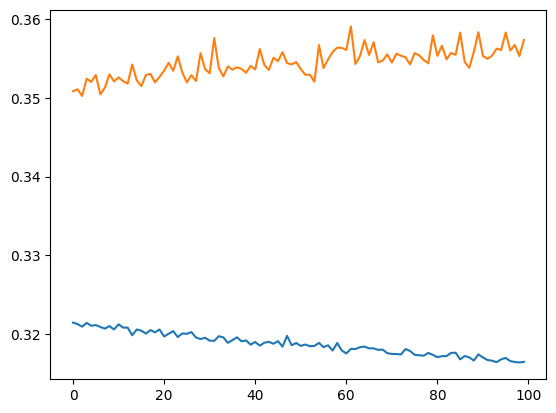

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

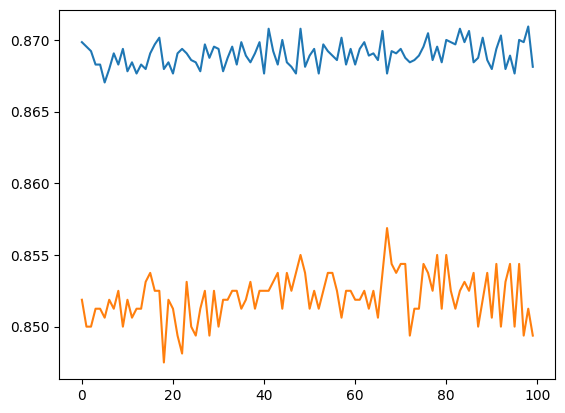

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()